# Computation of Eigenvalues for different Matrix Sizes

In [39]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt

In [26]:
def delta(n,m):
    '''Kronecker Delta'''
    if m==n:
        return 1
    else:
        return 0

def hamiltonian(N,lam):
    '''yields NxN Hamiltonian'''
    H = np.zeros((N,N))
    for n in range(0,N):
        for m in range(0,N):        
            H[n,m] = ((m+0.5)+ 0.25*lam *3*(2*m**2+2*m+1))*delta(n,m) + 0.25*lam*((4*m-2)*np.sqrt(m*(m-1)))*delta(n,m-2) + 0.25* lam*((4*m+6)*np.sqrt((m+1)*(m+2)))*delta(n,m+2) + 0.25*lam*(np.sqrt((m+1)*(m+2)*(m+3)*(m+4)))*delta(n,m+4) + 0.25*lam*(np.sqrt(m*(m-1)*(m-2)*(m-3)))*delta(n,m-4)    
    return H

In [27]:
def eigen(N,lam):
    '''yields array of first 10 eigenvalues for NxN hamiltpnian with N as first entry'''
    #N size matrix yields N eigenvectors and eigenvalues
    eigval,eigvect = linalg.eig(hamiltonian(N,lam))# yields eigenvalues and corresponding eigenvectors
    #sort eigenvalues and keep first 10 energy states
    eigval=np.sort(eigval)
    eigval = eigval[:10]
    ls = list(eigval)
    ls.insert(0,N)
    eigval = np.array(ls)
    return eigval

In [28]:
def eigvalN(Ni,Nf,lam):
    '''yields 2D array with 10 energy eigenvalues for each NxN Hamiltoninan in Ni,...,Nf'''
    eigvalN = []
    for N in range(Ni,Nf+1):
        eigvalN.append(eigen(N,lam))                       
    return np.array(eigvalN)

In [67]:
#Print and plot eigenvalues for each N
def showeig(Ni,Nf,lam):
    '''Prints and plots Eigenvalues for N in Ni,...,Nf'''
    E = eigvalN(Ni,Nf+1,lam)
    N = np.array([n for n in range(Ni,Nf+1)])
    En=[]
    for i in range(1,len(E[0]-1)):
        En.append((E[:,i]))
    En=np.array(En)
    for i in range(len(E)):
        print()
        print("For N="+str(int(E[i][0]))+":")
        for j in range(len(E[0])-1):
            print("E"+str(j)+"= "+str(E[i][j+1]))
    #Plot
    f, ax = plt.subplots(1,1,figsize=(8,8))
    for n in range(10):
        ax.plot(N,En[n], label=n)
    ax.grid()
    ax.legend(title="n")
    ax.set(xlabel = "Matrix size NxN", ylabel= "Eigenvalue En", title="EIgenvalues En as function of matrix size NxN")


For N=15:
E0= 0.5591463324427085
E1= 1.7695031621648474
E2= 3.1386252707591313
E3= 4.628959515379122
E4= 6.220696577912067
E5= 7.901533837802647
E6= 9.659854552927962
E7= 11.605314672288163
E8= 13.712419897866447
E9= 17.52006093881689

For N=16:
E0= 0.5591463324427091
E1= 1.7695027604919986
E2= 3.1386252707591367
E3= 4.628885711684121
E4= 6.220696577912084
E5= 7.9008960050984935
E6= 9.659854552927955
E7= 11.497362422311209
E8= 13.712419897866432
E9= 16.073801018123252

For N=17:
E0= 0.5591463273971469
E1= 1.7695027604919755
E2= 3.1386249668642665
E3= 4.628885711684113
E4= 6.220342160805786
E5= 7.900896005098501
E6= 9.659742932948296
E7= 11.497362422311216
E8= 13.433957097440759
E9= 16.07380101812326

For N=18:
E0= 0.5591463273971565
E1= 1.7695026521660642
E2= 3.1386249668642834
E3= 4.6288841749355365
E4= 6.220342160805769
E5= 7.900022644346688
E6= 9.659742932948276
E7= 11.489279883199902
E8= 13.43395709744073
E9= 15.513014363006082

For N=19:
E0= 0.5591463273962752
E1= 1.7695026521660

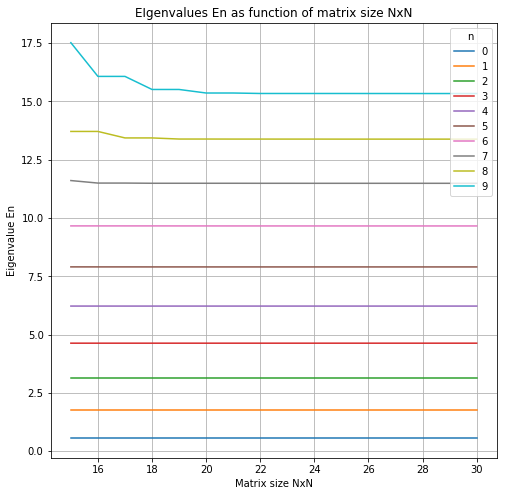

In [68]:
#shows Eigenvalues of states En=E0,...,E9 for matrix sizes NxN between Ni and Nf and chosen lambda value
Ni=15
Nf=30
lam=0.1

showeig(Ni,Nf,lam)

# Analytical Computation of Eigenvalues using the linearized equation

In [91]:
def analeig(N,lam):
    '''Analyticalle computes Eigenvalues using the characteristic polynomial'''
    #defining coefficient array of the characteristic polynomial as the Hamiltonian's diagnonal
    p = []
    for m in range(0,N):
        p.append((m+0.5)+ 0.25*lam *3*(2*m**2+2*m+1))
    p=np.array(p)

    #solving for the polynomial's roots
    eigvals = np.roots(p)

    #filter for real numbers
    En=[]
    for n in eigvals:
        if type(n)==float:
            En.append(n)
        else:
            pass
    En = np.array(En)
    En = np.sort(En)
    print(En)

In [ ]:
#Analytical calculation of Eigenvalues for a matrix of size NxN and lambda

N=20
lam=0.1
print(analeig(N,lam))